In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)

In [4]:
df=pd.read_csv('../data/df_cleaned.csv',index_col="datetime")
df

,stat_id,unit,scp,station,linename,entries_abs,exits_abs
datetime,,,,,,,
2022-10-01 00:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,92,474
2022-10-01 04:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,19,199
2022-10-01 08:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,10,167
2022-10-01 12:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,55,380
2022-10-01 16:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,91,580
...,...,...,...,...,...,...,...
2022-10-07 05:00:00,ZEREGA AV 00-05-01 R419,R326,00-05-01,ZEREGA AV,6,0,0
2022-10-07 09:00:00,ZEREGA AV 00-05-01 R419,R326,00-05-01,ZEREGA AV,6,0,0
2022-10-07 13:00:00,ZEREGA AV 00-05-01 R419,R326,00-05-01,ZEREGA AV,6,0,0


In [6]:
entries_top_10=df.groupby("station")["entries_abs"].sum().sort_values(ascending=False).head(10)
entries_bottom_10=df.groupby("station")["entries_abs"].sum().sort_values(ascending=True).head(10)

In [7]:
df.groupby(["station","scp"]).agg("sum").sort_values(by="entries_abs",ascending=False)

entries_abs  exits_abs
station         scp                             
23 ST           00-00-00        32250      62261
                00-00-02        29889      30129
GRD CNTRL-42 ST 00-06-01        28362      15797
23 ST           00-00-01        28303      30688
86 ST           00-00-01        25751      24896
...                               ...        ...
FAR ROCKAWAY    00-05-01            0          6
FLATBUSH AV-B.C 00-05-01            0         18
FLUSHING AV     00-05-01            0          0
FORDHAM RD      00-05-01            0         26
ZEREGA AV       00-05-01            0          0

[4429 rows x 2 columns]

In [9]:
df.groupby("station")["entries_abs"].sum().sort_values(ascending=False).head(10)

station
34 ST-PENN STA     353512
GRD CNTRL-42 ST    283849
34 ST-HERALD SQ    246804
42 ST-PORT AUTH    240693
23 ST              234212
86 ST              223727
TIMES SQ-42 ST     214198
FULTON ST          204352
125 ST             191234
14 ST-UNION SQ     181686
Name: entries_abs, dtype: int64

<AxesSubplot:xlabel='station'>

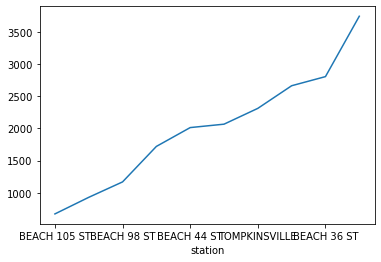

In [10]:
entries_bottom_10.plot()

<AxesSubplot:xlabel='entries_abs', ylabel='station'>

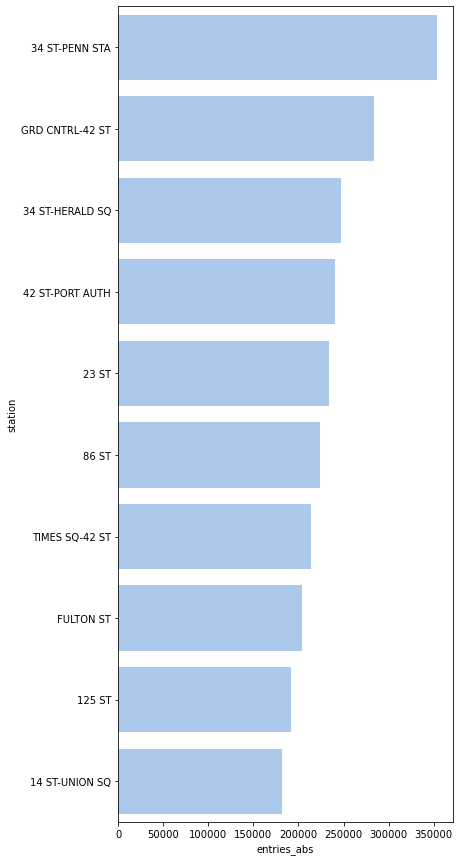

In [11]:
entries_top=df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).head(10)
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="entries_abs", y=entries_top.index, data=entries_top,
            label="Total", color="b")